# Verano FIME 2021

# (2018)

# PM2.5

In [1]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante1 = 'PM2_5'
# Se declaran las columnas a extraer de la base de datos
columns1 = ['timestamp', contaminante1]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante1 = pd.read_csv('filled.csv', usecols=columns1).dropna()
# Se convierten los strings a objeto datetime
strfdt1 = '%d-%b-%y %H'
dataframecontaminante1['timestamp'] = pd.to_datetime(dataframecontaminante1['timestamp'], errors = 'coerce', format=strfdt1)
# Se eliminan los espacios vacios
dataframecontaminante1 = dataframecontaminante1.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante1 = dataframecontaminante1.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante1

,timestamp,PM2_5
0,2003-06-01 00:00:00,99.00
1,2003-06-01 00:00:00,62.00
2,2003-06-01 00:00:00,29.00
3,2003-06-01 01:00:00,98.00
4,2003-06-01 01:00:00,75.00
...,...,...
528438,2018-12-31 23:00:00,22.58
528439,2018-12-31 23:00:00,199.00
528440,2018-12-31 23:00:00,111.00
528441,2018-12-31 23:00:00,295.00


In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante1['timestamp'] = dataframecontaminante1['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante1

,timestamp,PM2_5
0,2003-06-01 00,99.00
1,2003-06-01 00,62.00
2,2003-06-01 00,29.00
3,2003-06-01 01,98.00
4,2003-06-01 01,75.00
...,...,...
528438,2018-12-31 23,22.58
528439,2018-12-31 23,199.00
528440,2018-12-31 23,111.00
528441,2018-12-31 23,295.00


In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2018'
dataframecontaminanteaño1 = dataframecontaminante1.loc[dataframecontaminante1['timestamp'].str.startswith(año)]
dataframecontaminanteaño1 = dataframecontaminanteaño1.reset_index(drop=True)
dataframecontaminanteaño1

,timestamp,PM2_5
0,2018-01-01 01,21.00
1,2018-01-01 02,27.00
2,2018-01-01 02,9.00
3,2018-01-01 02,18.00
4,2018-01-01 02,25.00
...,...,...
55746,2018-12-31 23,22.58
55747,2018-12-31 23,199.00
55748,2018-12-31 23,111.00
55749,2018-12-31 23,295.00


In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño1['timestamp'] = pd.to_datetime(dataframecontaminanteaño1['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño1

,timestamp,PM2_5
0,2018-01-01 01:00:00,21.00
1,2018-01-01 02:00:00,27.00
2,2018-01-01 02:00:00,9.00
3,2018-01-01 02:00:00,18.00
4,2018-01-01 02:00:00,25.00
...,...,...
55746,2018-12-31 23:00:00,22.58
55747,2018-12-31 23:00:00,199.00
55748,2018-12-31 23:00:00,111.00
55749,2018-12-31 23:00:00,295.00


In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['sem'].apply(lambda x: x.week)
dataframecontaminanteaño1

,timestamp,PM2_5,sem
0,2018-01-01 01:00:00,21.00,1
1,2018-01-01 02:00:00,27.00,1
2,2018-01-01 02:00:00,9.00,1
3,2018-01-01 02:00:00,18.00,1
4,2018-01-01 02:00:00,25.00,1
...,...,...,...
55746,2018-12-31 23:00:00,22.58,1
55747,2018-12-31 23:00:00,199.00,1
55748,2018-12-31 23:00:00,111.00,1
55749,2018-12-31 23:00:00,295.00,1


In [6]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante1 = dataframecontaminanteaño1['sem'].value_counts()
semanascontaminante1 = semanascontaminante1.sort_index()
semanascontaminante1

1     1072
2      699
3      701
4      719
5      663
6      769
7      681
8      621
9      539
10     569
11     636
12     676
13     633
14     377
15     384
16     523
17     485
18     538
19     514
20     397
21     407
22     477
23     283
24     295
25     240
26     220
27     177
28     295
29     580
30     931
31    1312
32    1435
33    1488
34    1622
35    1893
36    1872
37    1740
38    1890
39    1807
40    1906
41    1889
42    1807
43    1874
44    2046
45    1864
46    1826
47    1839
48    2011
49    1905
50    1836
51    1939
52    1849
Name: sem, dtype: int64

In [7]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño1 = pd.DataFrame()
dataframesemanascontaminanteaño1['sem'] = semanascontaminante1.index
dataframesemanascontaminanteaño1[contaminante1] = ''
n = len(semanascontaminante1.index)
for i in range (n):
    registrossem = dataframecontaminanteaño1.loc[dataframecontaminanteaño1['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante1].mean()
    dataframesemanascontaminanteaño1[contaminante1][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño1

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88315/3779165028.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño1[contaminante1][i] = promediocontaminanteañosem


,sem,PM2_5
0,1,27.991437
1,2,26.519313
2,3,25.015692
3,4,26.22114
4,5,23.102564
5,6,32.860858
6,7,29.967695
7,8,26.028986
8,9,27.09833
9,10,23.1529


In [8]:
dataset1 = []
for i in dataframesemanascontaminanteaño1.index:
    dataset1.append(dataframesemanascontaminanteaño1[contaminante1][i])
dataset1

[27.99143656737769,
 26.51931330472103,
 25.015691868758918,
 26.221140472879,
 23.102564102564102,
 32.86085825747724,
 29.96769456681351,
 26.028985507246375,
 27.098330241187384,
 23.152899824253076,
 18.67138364779874,
 20.38609467455621,
 25.71563981042654,
 24.814323607427056,
 22.403645833333332,
 21.961759082217974,
 18.884536082474227,
 25.236059479553905,
 20.867704280155642,
 21.463476070528966,
 17.285012285012286,
 21.21802935010482,
 22.130742049469966,
 20.48135593220339,
 21.404166666666665,
 24.581818181818182,
 32.54237288135593,
 24.477966101694914,
 26.410844827586207,
 26.055445757250272,
 14.674253048780487,
 12.811156794425088,
 18.858340053763442,
 11.655727496917386,
 13.0539249868136,
 14.169519230769229,
 9.452712643678161,
 15.196915343915343,
 14.547941339236301,
 11.691526757427429,
 13.381058761249339,
 12.476463752075263,
 24.633030949839917,
 20.242937437637345,
 22.214871244635194,
 23.95924424972618,
 25.881245241979336,
 29.45514171795724,
 20.302724

# PM10

In [9]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante2 = 'PM10'
# Se declaran las columnas a extraer de la base de datos
columns2 = ['timestamp', contaminante2]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante2 = pd.read_csv('filled.csv', usecols=columns2).dropna()
# Se convierten los strings a objeto datetime
strfdt2 = '%d-%b-%y %H'
dataframecontaminante2['timestamp'] = pd.to_datetime(dataframecontaminante2['timestamp'], errors = 'coerce', format=strfdt2)
# Se eliminan los espacios vacios
dataframecontaminante2 = dataframecontaminante2.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante2 = dataframecontaminante2.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante2

,timestamp,PM10
0,1993-01-01 00:00:00,41.0
1,1993-01-01 00:00:00,30.5
2,1993-01-01 00:00:00,60.0
3,1993-01-01 00:00:00,38.5
4,1993-01-01 01:00:00,41.0
...,...,...
1382706,2018-12-31 23:00:00,445.0
1382707,2018-12-31 23:00:00,134.0
1382708,2018-12-31 23:00:00,392.0
1382709,2018-12-31 23:00:00,40.0


In [10]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante2['timestamp'] = dataframecontaminante2['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante2

,timestamp,PM10
0,1993-01-01 00,41.0
1,1993-01-01 00,30.5
2,1993-01-01 00,60.0
3,1993-01-01 00,38.5
4,1993-01-01 01,41.0
...,...,...
1382706,2018-12-31 23,445.0
1382707,2018-12-31 23,134.0
1382708,2018-12-31 23,392.0
1382709,2018-12-31 23,40.0


In [11]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño2 = dataframecontaminante2.loc[dataframecontaminante2['timestamp'].str.startswith(año)]
dataframecontaminanteaño2 = dataframecontaminanteaño2.reset_index(drop=True)
dataframecontaminanteaño2

,timestamp,PM10
0,2018-01-01 01,34.0
1,2018-01-01 01,38.0
2,2018-01-01 01,16.0
3,2018-01-01 01,27.0
4,2018-01-01 01,29.0
...,...,...
107918,2018-12-31 23,445.0
107919,2018-12-31 23,134.0
107920,2018-12-31 23,392.0
107921,2018-12-31 23,40.0


In [12]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño2['timestamp'] = pd.to_datetime(dataframecontaminanteaño2['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño2

,timestamp,PM10
0,2018-01-01 01:00:00,34.0
1,2018-01-01 01:00:00,38.0
2,2018-01-01 01:00:00,16.0
3,2018-01-01 01:00:00,27.0
4,2018-01-01 01:00:00,29.0
...,...,...
107918,2018-12-31 23:00:00,445.0
107919,2018-12-31 23:00:00,134.0
107920,2018-12-31 23:00:00,392.0
107921,2018-12-31 23:00:00,40.0


In [13]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['sem'].apply(lambda x: x.week)
dataframecontaminanteaño2

,timestamp,PM10,sem
0,2018-01-01 01:00:00,34.0,1
1,2018-01-01 01:00:00,38.0,1
2,2018-01-01 01:00:00,16.0,1
3,2018-01-01 01:00:00,27.0,1
4,2018-01-01 01:00:00,29.0,1
...,...,...,...
107918,2018-12-31 23:00:00,445.0,1
107919,2018-12-31 23:00:00,134.0,1
107920,2018-12-31 23:00:00,392.0,1
107921,2018-12-31 23:00:00,40.0,1


In [14]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante2 = dataframecontaminanteaño2['sem'].value_counts()
semanascontaminante2 = semanascontaminante2.sort_index()
semanascontaminante2

1     2306
2     2134
3     2168
4     2163
5     2021
6     2105
7     2091
8     2100
9     2107
10    2165
11    2142
12    2125
13    2161
14    2160
15    2063
16    2059
17    2107
18    2088
19    2134
20    2169
21    2078
22    2135
23    1993
24    2025
25    1942
26    2048
27    2143
28    2046
29    2149
30    2157
31    2120
32    2029
33    2018
34    1951
35    2039
36    2038
37    2064
38    2110
39    2075
40    2080
41    2049
42    1929
43    2013
44    2067
45    2060
46    1990
47    1970
48    2051
49    1887
50    1997
51    2052
52    2050
Name: sem, dtype: int64

In [15]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño2 = pd.DataFrame()
dataframesemanascontaminanteaño2['sem'] = semanascontaminante2.index
dataframesemanascontaminanteaño2[contaminante2] = ''
n = len(semanascontaminante2.index)
for i in range (n):
    registrossem = dataframecontaminanteaño2.loc[dataframecontaminanteaño2['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante2].mean()
    dataframesemanascontaminanteaño2[contaminante2][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño2

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88315/1374211484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño2[contaminante2][i] = promediocontaminanteañosem


,sem,PM10
0,1,59.727667
1,2,93.741799
2,3,64.851476
3,4,65.616736
4,5,67.367145
5,6,85.089786
6,7,74.005739
7,8,68.141905
8,9,66.424775
9,10,59.544573


In [16]:
dataset2 = []
for i in dataframesemanascontaminanteaño2.index:
    dataset2.append(dataframesemanascontaminanteaño2[contaminante2][i])
dataset2

[59.72766695576756,
 93.74179943767572,
 64.85147601476015,
 65.61673601479427,
 67.3671449777338,
 85.08978622327791,
 74.00573888091822,
 68.14190476190477,
 66.42477456098719,
 59.544572748267896,
 54.72549019607843,
 61.63670588235294,
 61.13142063859324,
 70.83194444444445,
 66.6388754241396,
 59.93831957260806,
 39.40199335548173,
 47.89224137931034,
 52.64526710402999,
 48.72660212079299,
 38.41289701636189,
 54.23653395784543,
 57.42900150526844,
 45.995061728395065,
 41.53038105046344,
 50.7958984375,
 73.90760615958936,
 63.8049853372434,
 85.5374080967892,
 85.03537783959203,
 49.3863537735849,
 43.603652045342535,
 54.418666997026754,
 43.56330087134803,
 44.50367827366356,
 40.369970559371936,
 28.180717054263567,
 38.27772511848341,
 36.67325301204819,
 32.93942307692308,
 33.537959980478284,
 30.005666148263348,
 51.18896671634377,
 58.88134978229318,
 56.23349514563107,
 58.518090452261305,
 51.56294416243655,
 86.45928815212092,
 46.42381028086911,
 60.416479719579364,

# NOX

In [17]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante3 = 'NOX'
# Se declaran las columnas a extraer de la base de datos
columns3 = ['timestamp', contaminante3]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante3 = pd.read_csv('filled.csv', usecols=columns3).dropna()
# Se convierten los strings a objeto datetime
strfdt3 = '%d-%b-%y %H'
dataframecontaminante3['timestamp'] = pd.to_datetime(dataframecontaminante3['timestamp'], errors = 'coerce', format=strfdt3)
# Se eliminan los espacios vacios
dataframecontaminante3 = dataframecontaminante3.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante3 = dataframecontaminante3.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante3

,timestamp,NOX
0,1993-01-01 00:00:00,6.750000
1,1993-01-01 00:00:00,8.500000
2,1993-01-01 00:00:00,11.000000
3,1993-01-01 00:00:00,17.500000
4,1993-01-01 01:00:00,4.000000
...,...,...
1128925,2018-12-31 23:00:00,74.400002
1128926,2018-12-31 23:00:00,207.000000
1128927,2018-12-31 23:00:00,27.000000
1128928,2018-12-31 23:00:00,70.099998


In [18]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante3['timestamp'] = dataframecontaminante3['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante3

,timestamp,NOX
0,1993-01-01 00,6.750000
1,1993-01-01 00,8.500000
2,1993-01-01 00,11.000000
3,1993-01-01 00,17.500000
4,1993-01-01 01,4.000000
...,...,...
1128925,2018-12-31 23,74.400002
1128926,2018-12-31 23,207.000000
1128927,2018-12-31 23,27.000000
1128928,2018-12-31 23,70.099998


In [19]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño3 = dataframecontaminante3.loc[dataframecontaminante3['timestamp'].str.startswith(año)]
dataframecontaminanteaño3 = dataframecontaminanteaño3.reset_index(drop=True)
dataframecontaminanteaño3

,timestamp,NOX
0,2018-01-01 01,7.000000
1,2018-01-01 01,42.700000
2,2018-01-01 01,7.000000
3,2018-01-01 01,29.800000
4,2018-01-01 01,8.500000
...,...,...
41615,2018-12-31 23,74.400002
41616,2018-12-31 23,207.000000
41617,2018-12-31 23,27.000000
41618,2018-12-31 23,70.099998


In [20]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño3['timestamp'] = pd.to_datetime(dataframecontaminanteaño3['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño3

,timestamp,NOX
0,2018-01-01 01:00:00,7.000000
1,2018-01-01 01:00:00,42.700000
2,2018-01-01 01:00:00,7.000000
3,2018-01-01 01:00:00,29.800000
4,2018-01-01 01:00:00,8.500000
...,...,...
41615,2018-12-31 23:00:00,74.400002
41616,2018-12-31 23:00:00,207.000000
41617,2018-12-31 23:00:00,27.000000
41618,2018-12-31 23:00:00,70.099998


In [21]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['sem'].apply(lambda x: x.week)
dataframecontaminanteaño3

,timestamp,NOX,sem
0,2018-01-01 01:00:00,7.000000,1
1,2018-01-01 01:00:00,42.700000,1
2,2018-01-01 01:00:00,7.000000,1
3,2018-01-01 01:00:00,29.800000,1
4,2018-01-01 01:00:00,8.500000,1
...,...,...,...
41615,2018-12-31 23:00:00,74.400002,1
41616,2018-12-31 23:00:00,207.000000,1
41617,2018-12-31 23:00:00,27.000000,1
41618,2018-12-31 23:00:00,70.099998,1


In [22]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante3 = dataframecontaminanteaño3['sem'].value_counts()
semanascontaminante3 = semanascontaminante3.sort_index()
semanascontaminante3

1     1038
2      893
3     1072
4     1119
5     1120
6     1173
7     1162
8     1142
9     1124
10    1016
11     974
12     970
13     959
14     972
15     971
16     968
17     938
18     828
19     927
20     956
21     944
22     877
23     729
24     696
25     659
26     578
27     586
28     482
29     523
30     567
31     477
32     478
33     342
34     384
35     498
36     781
37     785
38     715
39     857
40     756
41     696
42     701
43     713
44     692
45     708
46     767
47     802
48     669
49     616
50     708
51     740
52     772
Name: sem, dtype: int64

In [23]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño3 = pd.DataFrame()
dataframesemanascontaminanteaño3['sem'] = semanascontaminante3.index
dataframesemanascontaminanteaño3[contaminante3] = ''
n = len(semanascontaminante3.index)
for i in range (n):
    registrossem = dataframecontaminanteaño3.loc[dataframecontaminanteaño3['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante3].mean()
    dataframesemanascontaminanteaño3[contaminante3][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño3

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88315/802629888.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño3[contaminante3][i] = promediocontaminanteañosem


,sem,NOX
0,1,42.139981
1,2,43.792161
2,3,39.693004
3,4,36.603932
4,5,34.3775
5,6,44.279625
6,7,41.696041
7,8,37.881961
8,9,41.252313
9,10,35.665157


In [24]:
dataset3 = []
for i in dataframesemanascontaminanteaño3.index:
    dataset3.append(dataframesemanascontaminanteaño3[contaminante3][i])
dataset3

[42.13998073805733,
 43.79216125419933,
 39.693003731343275,
 36.60393208221627,
 34.377500000000005,
 44.27962489343564,
 41.696041308089505,
 37.881961471103324,
 41.252313167259786,
 35.66515748031496,
 22.00266940451745,
 24.94474226804124,
 23.230031283580473,
 28.320781893004117,
 22.819876416065913,
 21.45485537190083,
 21.33763326226013,
 31.187801930985017,
 39.067853290183386,
 33.55753138075314,
 38.470021186440675,
 19.28859749220932,
 18.45843621399177,
 17.79080459770115,
 25.695295902883164,
 22.426643597625944,
 24.502047781569967,
 43.55746887966805,
 22.465391969407264,
 37.72945326278659,
 22.5146750524109,
 24.383472803347278,
 22.371929824561402,
 21.769270833333334,
 21.500602407340544,
 19.13111395646607,
 16.46152866242038,
 16.937482517482515,
 20.792765460910154,
 21.78584656053119,
 22.04712643678161,
 32.30927246790299,
 35.99873772791024,
 34.74349711203161,
 36.711016949152544,
 51.55801825293351,
 47.46458852867831,
 60.91195815789147,
 45.6685064935065,


# NO2

In [25]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante4 = 'NO2'
# Se declaran las columnas a extraer de la base de datos
columns4 = ['timestamp', contaminante4]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante4 = pd.read_csv('filled.csv', usecols=columns4).dropna()
# Se convierten los strings a objeto datetime
strfdt4 = '%d-%b-%y %H'
dataframecontaminante4['timestamp'] = pd.to_datetime(dataframecontaminante4['timestamp'], errors = 'coerce', format=strfdt4)
# Se eliminan los espacios vacios
dataframecontaminante4 = dataframecontaminante4.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante4 = dataframecontaminante4.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante4

,timestamp,NO2
0,1993-01-01 00:00:00,5.750000
1,1993-01-01 00:00:00,11.000000
2,1993-01-01 00:00:00,6.750000
3,1993-01-01 00:00:00,14.250000
4,1993-01-01 01:00:00,3.250000
...,...,...
1130352,2018-12-31 23:00:00,21.600000
1130353,2018-12-31 23:00:00,31.400000
1130354,2018-12-31 23:00:00,8.400000
1130355,2018-12-31 23:00:00,11.800000


In [26]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante4['timestamp'] = dataframecontaminante4['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante4

,timestamp,NO2
0,1993-01-01 00,5.750000
1,1993-01-01 00,11.000000
2,1993-01-01 00,6.750000
3,1993-01-01 00,14.250000
4,1993-01-01 01,3.250000
...,...,...
1130352,2018-12-31 23,21.600000
1130353,2018-12-31 23,31.400000
1130354,2018-12-31 23,8.400000
1130355,2018-12-31 23,11.800000


In [27]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño4 = dataframecontaminante4.loc[dataframecontaminante4['timestamp'].str.startswith(año)]
dataframecontaminanteaño4 = dataframecontaminanteaño4.reset_index(drop=True)
dataframecontaminanteaño4

,timestamp,NO2
0,2018-01-01 01,2.900000
1,2018-01-01 01,15.200000
2,2018-01-01 01,2.900000
3,2018-01-01 01,17.800000
4,2018-01-01 01,3.600000
...,...,...
41615,2018-12-31 23,21.600000
41616,2018-12-31 23,31.400000
41617,2018-12-31 23,8.400000
41618,2018-12-31 23,11.800000


In [28]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño4['timestamp'] = pd.to_datetime(dataframecontaminanteaño4['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño4

,timestamp,NO2
0,2018-01-01 01:00:00,2.900000
1,2018-01-01 01:00:00,15.200000
2,2018-01-01 01:00:00,2.900000
3,2018-01-01 01:00:00,17.800000
4,2018-01-01 01:00:00,3.600000
...,...,...
41615,2018-12-31 23:00:00,21.600000
41616,2018-12-31 23:00:00,31.400000
41617,2018-12-31 23:00:00,8.400000
41618,2018-12-31 23:00:00,11.800000


In [29]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['sem'].apply(lambda x: x.week)
dataframecontaminanteaño4

,timestamp,NO2,sem
0,2018-01-01 01:00:00,2.900000,1
1,2018-01-01 01:00:00,15.200000,1
2,2018-01-01 01:00:00,2.900000,1
3,2018-01-01 01:00:00,17.800000,1
4,2018-01-01 01:00:00,3.600000,1
...,...,...,...
41615,2018-12-31 23:00:00,21.600000,1
41616,2018-12-31 23:00:00,31.400000,1
41617,2018-12-31 23:00:00,8.400000,1
41618,2018-12-31 23:00:00,11.800000,1


In [30]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante4 = dataframecontaminanteaño4['sem'].value_counts()
semanascontaminante4 = semanascontaminante4.sort_index()
semanascontaminante4

1     1038
2      893
3     1072
4     1119
5     1120
6     1173
7     1162
8     1142
9     1124
10    1016
11     974
12     970
13     959
14     972
15     971
16     968
17     938
18     828
19     927
20     956
21     944
22     877
23     729
24     696
25     659
26     578
27     586
28     482
29     523
30     567
31     477
32     478
33     342
34     384
35     498
36     781
37     785
38     715
39     857
40     756
41     696
42     701
43     713
44     692
45     708
46     767
47     802
48     669
49     616
50     708
51     740
52     772
Name: sem, dtype: int64

In [31]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño4 = pd.DataFrame()
dataframesemanascontaminanteaño4['sem'] = semanascontaminante4.index
dataframesemanascontaminanteaño4[contaminante4] = ''
n = len(semanascontaminante4.index)
for i in range (n):
    registrossem = dataframecontaminanteaño4.loc[dataframecontaminanteaño4['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante4].mean()
    dataframesemanascontaminanteaño4[contaminante4][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño4

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88315/1549920633.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño4[contaminante4][i] = promediocontaminanteañosem


,sem,NO2
0,1,16.23237
1,2,20.330123
2,3,17.723694
3,4,17.324397
4,5,18.167679
5,6,17.848679
6,7,18.395095
7,8,16.663573
8,9,13.786121
9,10,11.613287


In [32]:
dataset4 = []
for i in dataframesemanascontaminanteaño4.index:
    dataset4.append(dataframesemanascontaminanteaño4[contaminante4][i])
dataset4

[16.2323699434828,
 20.330123180291157,
 17.723694029850748,
 17.324396782841823,
 18.167678571428574,
 17.848678601875534,
 18.395094664371776,
 16.66357267950963,
 13.786120996441282,
 11.613287401574803,
 10.730492813141684,
 11.159587628865978,
 10.82440041670337,
 13.027572016460905,
 10.943769309989703,
 10.676446280991737,
 9.532089552238805,
 13.377898550724638,
 11.20571736785329,
 8.64623430962343,
 7.847351694915254,
 9.79657924689072,
 10.382167352537724,
 10.706752873563218,
 14.71001517450683,
 10.874567473965946,
 13.289078498293515,
 16.388174273858922,
 11.080497131931168,
 11.161552028218695,
 12.82599580712788,
 12.726778242677824,
 12.431286549707602,
 10.652604166666666,
 11.204417669629477,
 10.11293213828425,
 8.678980891719744,
 8.677762237762238,
 9.554259043173863,
 10.63716931166472,
 10.998419540229884,
 14.66533523537803,
 17.314726507713882,
 16.0856936435479,
 16.791807909604522,
 21.218774445893093,
 19.989775561097257,
 23.516442457407223,
 18.442045454

In [33]:
# Se importa el archivo creado
import visualization_spiderwebs

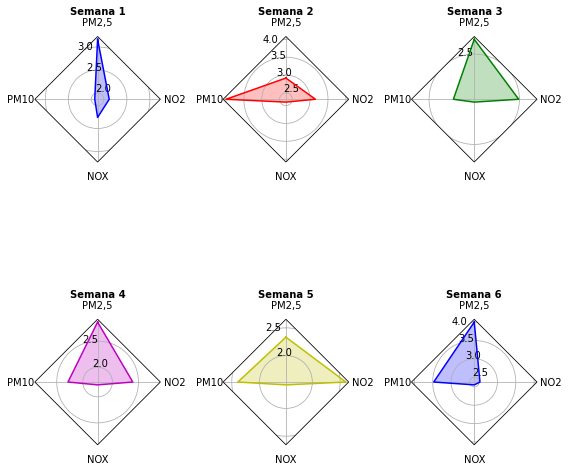

In [34]:
alldata = []
alldata.append(dataset1)
alldata.append(dataset2)
alldata.append(dataset3)
alldata.append(dataset4)
title = 'Contaminantes-'+año
spoke_labels = ['PM2,5','PM10','NOX','NO2']
titles = titles = ['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4', 'Semana 5', 'Semana 6']
colors = ['b', 'r', 'g', 'm', 'y', 'b']
visualization_spiderwebs.create_spiderwebs(alldata, 4, 6, title, titles, spoke_labels, colors, 'polygon')